Notre service de contre-espionnage a intercepté un message codé en fréquences. 

Notre service de contre-espionnage a commencé un programme de décodage, mais n'a pas pu le mener à bout.

Selon notre expert, le message contient un code à 4 chiffres. Chaque chiffre est codé par une modulation d'amplitude de 4 fréquences. 

Les basses fréquences représentent le bits de poids fort, et les hautes fréquences les bits de poids faible. Un chiffre est donc reconstitué par une formule

$C=A0*8 + A1*4 + A2*2 + A3$.

où Ai vaut 1 quand l'amplitude est plus grande. 

Quel est le chiffre ?

Le programme est ci-dessous, mais l'expert a été liquidé avant de pouvoir finir son programme de décryptage. Notre service peut constater que les amplitudes décodées sont trop irrégulière pour pouvoir déchiffrer le message. Que faire ?

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

32768 8192
[500 510 520 530]
[2445.76728478 3482.07547742 2700.37411592 3917.10816703]
[500 510 520 530]
[2418.08956374 3846.5803166  3372.79516017 3912.45114288]
[500 511 520 531]
[2765.66433536 3151.00820837 3728.07149207 2704.49293091]
[500 510 520 530]
[2451.68805287 3491.66233977 3010.43229934 3909.89903625]


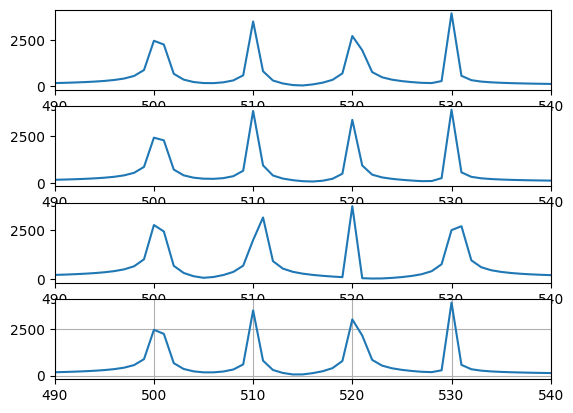

In [24]:
# Chargement du fichier avec le code
with open('supercoded.npy', 'rb') as f:
    code = np.load(f)
    
# Les 4 chiffres se suivent et sont de même longueur
N=len(code)
P=N//4
print(N,P)
codeRange=np.arange(P)

fig, ax=plt.subplots(4)

for i in range(4):
    oneCode=code[codeRange+i*P]

    # TODO
    # Il faut trouver une fenêtre
    # calculer la fenêtre ici, je ne me souviens plus comment faire...

    # Calculer la FFT
    fftOneCode = np.abs(np.fft.fft(oneCode))

    # Retrouve les maximums
    peaks,_=sp.signal.find_peaks(fftOneCode, height=700)
    peaks=peaks[0:4]
    print(peaks)
    vPeak=fftOneCode[peaks]
    print(vPeak)

    # Fait un graphique
    ax[i].plot(fftOneCode)
    ax[i].set_xlim([490, 540])
plt.grid()
plt.show()


